In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from node2vec import Node2Vec

In [2]:
from kaki.kkdatac.crypto import get_price, get_pairs

In [3]:
pairs = get_pairs("kline-1D")

In [5]:
data = get_price(instId=get_pairs(col="kline-1D"), bar="1D", fields=["open", "high", "low", "close", "instId"])
data.set_index(["instId", "timestamp"])


100%|██████████| 493/493 [00:09<00:00, 49.63it/s]


open    high     low   close
instId        timestamp                                          
1INCH-USDT    2020-12-24 16:00:00  2.0000  2.9620  1.5720  1.8850
              2020-12-25 16:00:00  1.8820  2.5700  1.5730  1.6420
              2020-12-26 16:00:00  1.6450  1.8000  1.1620  1.3570
              2020-12-27 16:00:00  1.3570  1.4420  1.0420  1.1690
              2020-12-28 16:00:00  1.1710  1.1710  0.7710  0.8000
...                                   ...     ...     ...     ...
ZRX-USDT-SWAP 2024-03-06 16:00:00  0.4747  0.5751  0.4661  0.5126
              2024-03-07 16:00:00  0.5124  0.5484  0.4889  0.5203
              2024-03-08 16:00:00  0.5204  0.5809  0.5132  0.5666
              2024-03-09 16:00:00  0.5666  0.8159  0.5633  0.7788
              2024-03-10 16:00:00  0.7789  1.0867  0.7578  0.8629

[458314 rows x 4 columns]

In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.groupby('instId').filter(lambda x: len(x) >= 60)
# Sort the DataFrame by 'instId' and 'timestamp'
filtered_data = data.sort_values(by=['instId', 'timestamp'])

# Get the last 60 days' groups for each 'instId'
last_60_days_data = filtered_data.groupby('instId').tail(60)


last_60_days_data = last_60_days_data.set_index(["instId", "timestamp"])
last_60_days_data.loc["1INCH-USDT"]

,open,high,low,close
timestamp,,,,
2024-01-11 16:00:00,0.4869,0.5259,0.4750,0.4840
2024-01-12 16:00:00,0.4838,0.4997,0.4510,0.4867
2024-01-13 16:00:00,0.4868,0.5054,0.4681,0.4709
2024-01-14 16:00:00,0.4705,0.4836,0.4564,0.4586
2024-01-15 16:00:00,0.4579,0.4761,0.4445,0.4620
2024-01-16 16:00:00,0.4621,0.4792,0.4496,0.4512
2024-01-17 16:00:00,0.4508,0.4609,0.4370,0.4431
2024-01-18 16:00:00,0.4434,0.4434,0.4098,0.4109
2024-01-19 16:00:00,0.4109,0.4205,0.3943,0.4157


In [7]:
percent_change = last_60_days_data.groupby('instId')['close'].pct_change()
last_60_days_data['Daily Return'] = percent_change

# Drop rows containing NaN values
last_60_days_data.dropna(inplace=True)

In [8]:
last_60_days_data

open    high     low   close  \
instId        timestamp                                             
1INCH-USDT    2024-01-12 16:00:00  0.4838  0.4997  0.4510  0.4867   
              2024-01-13 16:00:00  0.4868  0.5054  0.4681  0.4709   
              2024-01-14 16:00:00  0.4705  0.4836  0.4564  0.4586   
              2024-01-15 16:00:00  0.4579  0.4761  0.4445  0.4620   
              2024-01-16 16:00:00  0.4621  0.4792  0.4496  0.4512   
...                                   ...     ...     ...     ...   
ZRX-USDT-SWAP 2024-03-06 16:00:00  0.4747  0.5751  0.4661  0.5126   
              2024-03-07 16:00:00  0.5124  0.5484  0.4889  0.5203   
              2024-03-08 16:00:00  0.5204  0.5809  0.5132  0.5666   
              2024-03-09 16:00:00  0.5666  0.8159  0.5633  0.7788   
              2024-03-10 16:00:00  0.7789  1.0867  0.7578  0.8629   

                                   Daily Return  
instId        timestamp                          
1INCH-USDT    2024-01-12 16:00:00      0.005579  
              2024-01-13 16:00:00     -0.032464  
              2024-01-14 16:00:00     -0.026120  
              2024-01-15 16:00:00      0.007414  
              2024-01-16 16:00:00     -0.023377  
...                                         ...  
ZRX-USDT-SWAP 2024-03-06 16:00:00      0.079840  
              2024-03-07 16:00:00      0.015021  
              2024-03-08 16:00:00      0.088987  
              2024-03-09 16:00:00      0.374515  
              2024-03-10 16:00:00      0.107987  

[27730 rows x 5 columns]

In [9]:
corr_df = last_60_days_data.pivot_table(values='Daily Return', index='timestamp', columns='instId').corr()

In [10]:
corr_df

instId,1INCH-USDT,1INCH-USDT-SWAP,AAVE-USDT,AAVE-USDT-SWAP,ACA-USDT,ACE-USDT,ACE-USDT-SWAP,ACH-USDT,ADA-USDT,ADA-USDT-SWAP,...,XTZ-USDT-SWAP,YFI-USDT,YFI-USDT-SWAP,YGG-USDT,YGG-USDT-SWAP,ZBC-USDT,ZIL-USDT,ZIL-USDT-SWAP,ZRX-USDT,ZRX-USDT-SWAP
instId,,,,,,,,,,,,,,,,,,,,,
1INCH-USDT,1.000000,0.999733,0.802006,0.803027,0.493065,0.450035,0.452154,0.560932,0.737394,0.736622,...,0.523766,0.507096,0.504431,0.228028,0.226791,0.289658,0.673076,0.674345,0.354624,0.355442
1INCH-USDT-SWAP,0.999733,1.000000,0.802585,0.803707,0.493628,0.445232,0.447439,0.563675,0.738139,0.737414,...,0.521670,0.505448,0.502918,0.226130,0.224953,0.287389,0.673558,0.674812,0.352776,0.353702
AAVE-USDT,0.802006,0.802585,1.000000,0.999788,0.421579,0.406632,0.409590,0.535917,0.666261,0.665955,...,0.471627,0.439589,0.439918,0.150559,0.151418,0.160903,0.596448,0.598603,0.232149,0.234629
AAVE-USDT-SWAP,0.803027,0.803707,0.999788,1.000000,0.429013,0.408835,0.411793,0.538107,0.670839,0.670575,...,0.472323,0.441575,0.442110,0.152939,0.153784,0.161398,0.599807,0.602042,0.234054,0.236587
ACA-USDT,0.493065,0.493628,0.421579,0.429013,1.000000,0.356707,0.361415,0.390256,0.519499,0.519744,...,0.403911,0.405267,0.403733,0.300379,0.302747,0.312774,0.371837,0.378893,0.184243,0.184150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBC-USDT,0.289658,0.287389,0.160903,0.161398,0.312774,0.390124,0.393251,0.212674,0.251189,0.251430,...,0.309363,0.089578,0.089011,0.489114,0.489230,1.000000,0.245959,0.247579,0.356280,0.356673
ZIL-USDT,0.673076,0.673558,0.596448,0.599807,0.371837,0.441473,0.442385,0.377299,0.603855,0.602953,...,0.391869,0.463374,0.462730,0.286927,0.286621,0.245959,1.000000,0.999635,0.372105,0.374373
ZIL-USDT-SWAP,0.674345,0.674812,0.598603,0.602042,0.378893,0.446372,0.447449,0.386026,0.608747,0.607985,...,0.399220,0.468688,0.467867,0.288964,0.288689,0.247579,0.999635,1.000000,0.377062,0.379361


In [11]:
corr_df[corr_df<0.7] = 0
np.fill_diagonal(corr_df.values, 0)

<Axes: xlabel='instId', ylabel='instId'>

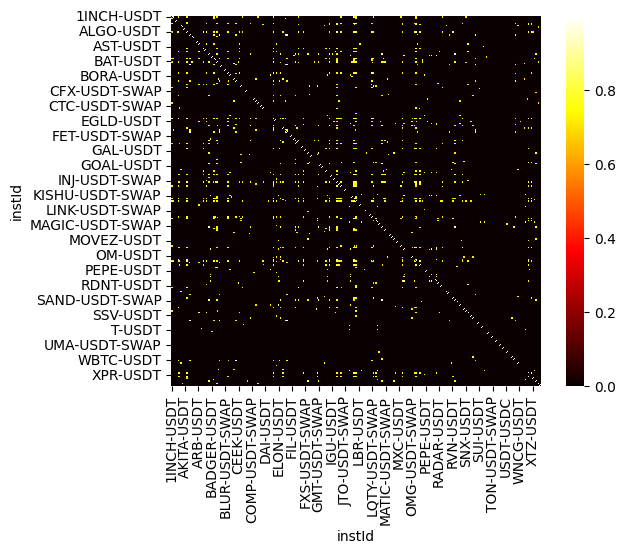

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_df, cmap="hot", cbar=True, annot=False, square=True, fmt=".2f")

### Loading the correlation dataframe into a Graph

In [13]:
graph = nx.Graph(corr_df)

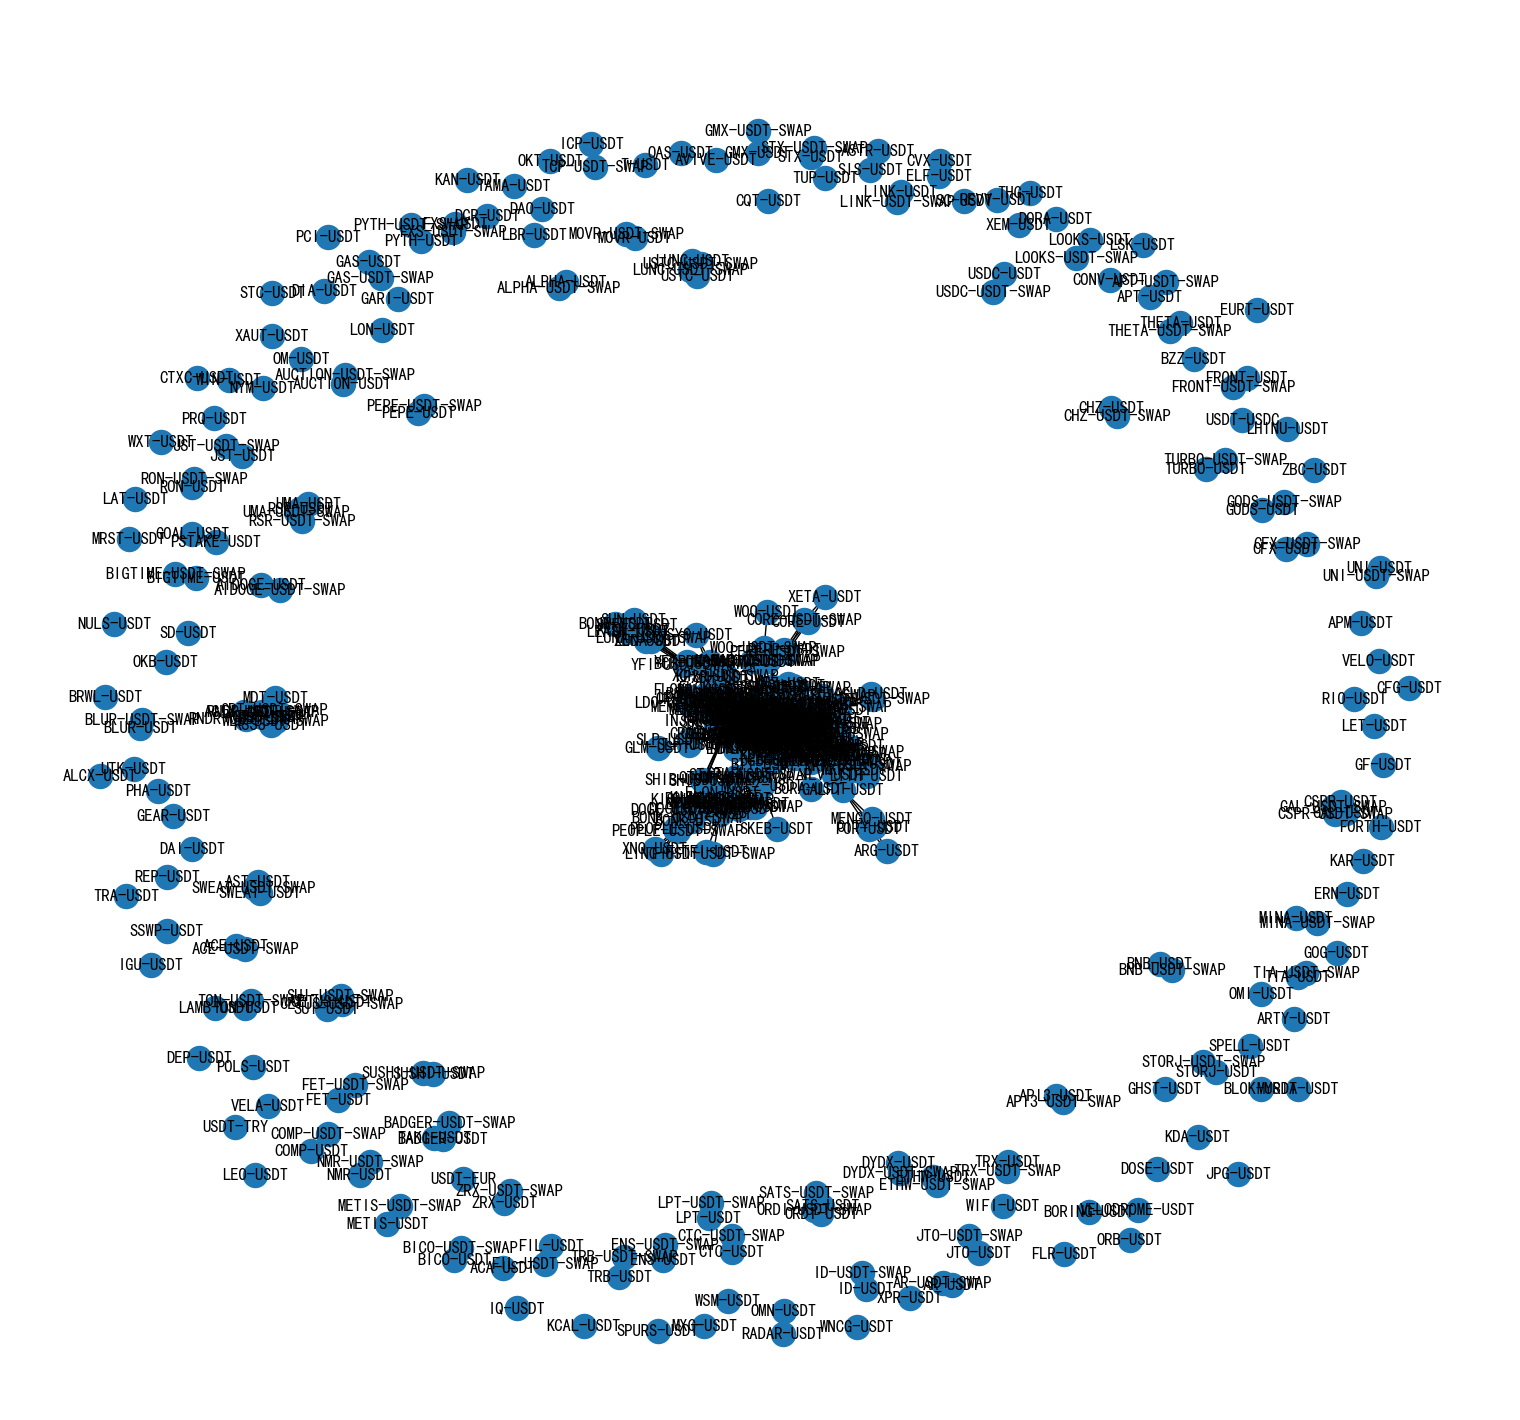

In [14]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # Visualization in Chinese in case you need 
plt.rcParams['axes.unicode_minus']=False  # Visualize the negative sign normally

plt.figure(figsize=(15,14))
pos = nx.spring_layout(graph, seed=5)
nx.draw(graph, pos, with_labels=True)
plt.show()

### Training the Model

In [15]:
node2vec = Node2Vec(graph, 
                    dimensions=32,  # Embedding dimension
                    p=1,            # Go back parameter
                    q=3,          # Go forward parameter
                    walk_length=10, # Random walk length
                    num_walks=600,  # Number of random walks
                    workers=4       # Number of parallel processes
                   )



model = node2vec.fit(window=3,
                     min_count=1, 
                     batch_words=4 
                    )
X = model.wv.vectors

Generating walks (CPU: 4): 100%|██████████| 150/150 [00:09<00:00, 16.02it/s]


#### Getting the most similar groups to the wanted index

In [16]:
out = model.wv.most_similar('1INCH-USDT')

out = pd.DataFrame(out)
out.columns = ['ticker', 'Similarity(%)']
out["Similarity(%)"] = out["Similarity(%)"] * 100

In [17]:
out

,ticker,Similarity(%)
0,1INCH-USDT-SWAP,99.773151
1,NEAR-USDT,69.368112
2,NEAR-USDT-SWAP,66.822326
3,JOE-USDT-SWAP,66.250873
4,SNX-USDT,64.992619
5,JOE-USDT,63.934213
6,SNX-USDT-SWAP,63.567322
7,CRV-USDT,62.007314
8,AAVE-USDT-SWAP,61.624360
9,KSM-USDT-SWAP,61.180824
